In [1]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

from udonpred_benchmarking.constants import DATA_DIR
from udonpred_benchmarking.plots import set_theme

In [2]:
protein_df = pl.read_csv(DATA_DIR / "per_protein_performance.csv")
protein_stats = pl.read_csv(DATA_DIR / "per_protein_stats.csv")
df = protein_df.join(protein_stats, on="ID")

set_theme()

### Overall distribution

Text(0, 0.5, 'Avg. G-score')

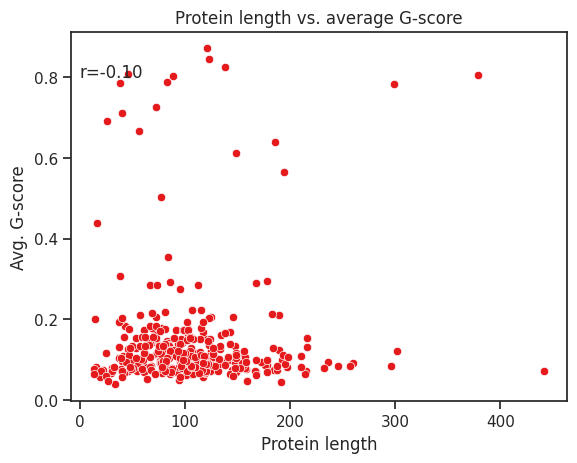

In [3]:
spearman_r = df.select(pl.corr("pscore_mean", "len", method="spearman")).item(0, 0)

sns.scatterplot(
    df[["ID", "pscore_mean", "len"]].unique(),
    x="len",
    y="pscore_mean"
)
plt.text(.05, .8, f"r={spearman_r:.2f}")
plt.title("Protein length vs. average G-score")
plt.xlabel("Protein length")
plt.ylabel("Avg. G-score")

### Stratified by method

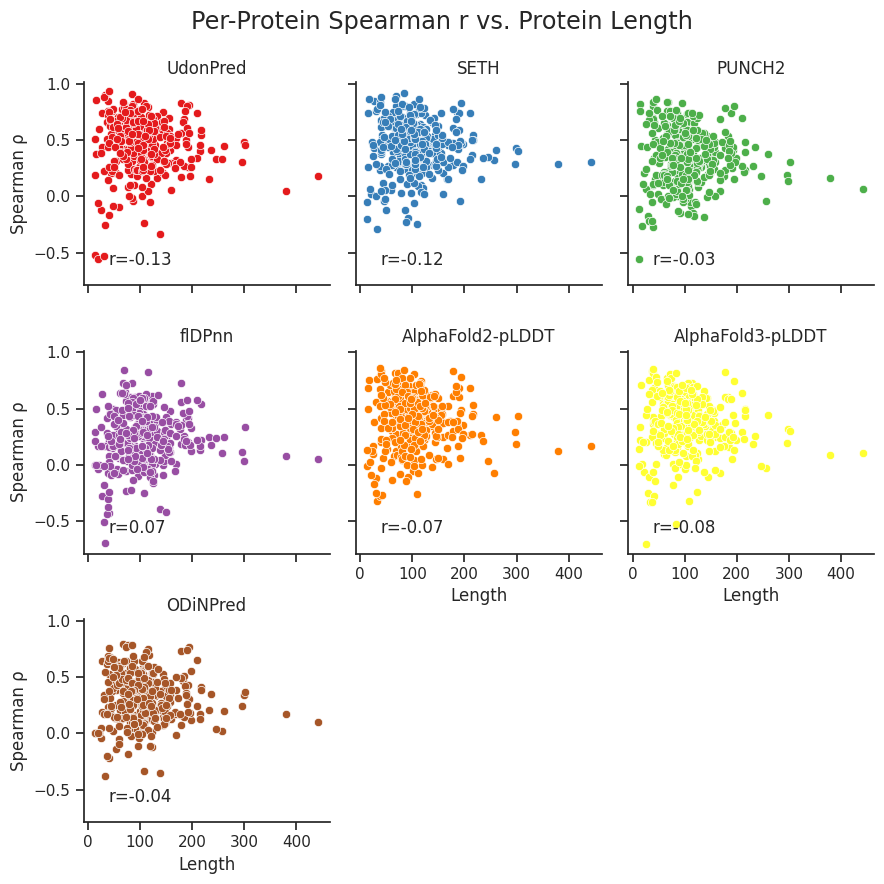

In [4]:
def annotate_facetplot(data, **kws):
    spearman_r = pl.DataFrame(data).select(pl.corr("len", "value", method="spearman")).item(0, 0)
    ax = plt.gca()
    ax.text(.1, .1, f"r={spearman_r:.2f}", transform=ax.transAxes)

g = sns.FacetGrid(
    df.filter(pl.col("metric") == "spearman"),
    col="method",
    col_wrap=3,
    hue="method",
    )

g.map(sns.scatterplot, "len", "value")
g.map_dataframe(annotate_facetplot)
plt.suptitle("Per-Protein Spearman r vs. Protein Length", fontsize="x-large")
g.set_titles(col_template="{col_name}")
g.figure.subplots_adjust(top=.9)
g.set_ylabels("Spearman ρ")
g.set_xlabels("Length")